In [143]:
import numpy as np
import scipy.linalg as lg
import numpy.linalg as nlg
from sklearn.decomposition import PCA
from sklearn.covariance import EmpiricalCovariance
import matplotlib.pyplot as plt

In [6]:
num_data = 100
len_data = 10
data = np.random.randn((len_data*num_data)).reshape(num_data, len_data)
mean = np.mean(data,axis=0)

In [15]:
cov1 = EmpiricalCovariance().fit(data).covariance_ # uses 1/N
cov2 = np.dot((data-mean).T, (data-mean))/(num_data-1)
print(cov1/cov2)

[[ 0.99  0.99  0.99  0.99  0.99  0.99  0.99  0.99  0.99  0.99]
 [ 0.99  0.99  0.99  0.99  0.99  0.99  0.99  0.99  0.99  0.99]
 [ 0.99  0.99  0.99  0.99  0.99  0.99  0.99  0.99  0.99  0.99]
 [ 0.99  0.99  0.99  0.99  0.99  0.99  0.99  0.99  0.99  0.99]
 [ 0.99  0.99  0.99  0.99  0.99  0.99  0.99  0.99  0.99  0.99]
 [ 0.99  0.99  0.99  0.99  0.99  0.99  0.99  0.99  0.99  0.99]
 [ 0.99  0.99  0.99  0.99  0.99  0.99  0.99  0.99  0.99  0.99]
 [ 0.99  0.99  0.99  0.99  0.99  0.99  0.99  0.99  0.99  0.99]
 [ 0.99  0.99  0.99  0.99  0.99  0.99  0.99  0.99  0.99  0.99]
 [ 0.99  0.99  0.99  0.99  0.99  0.99  0.99  0.99  0.99  0.99]]


In [17]:
# PCA
pca = PCA(svd_solver='full',n_components=len_data).fit(data) #covariance estimate with 1/(n-1)
R   = pca.components_
var = pca.explained_variance_
np.mean(np.dot(np.dot(R.T,np.diag(var)),R)/cov2)

# Eigenvalue
var1, R1 = lg.eigh(cov2)
index = np.argsort(var1)[::-1]
print(np.mean(var1[index]/var))
print(np.mean(np.dot(np.dot(R1,np.diag(var1)),R1.T)/cov2))
R11 = R1.T[index]
var11 = var1[index]
print(np.mean(np.dot(np.dot(R11.T,np.diag(var1[index])),R11)/cov2))

# SingularValue
U, s, Vh = lg.svd(cov2)
index = np.argsort(s)[::-1]
s1    = s[index]
print(np.mean(s1/var11))
print(np.mean(np.dot(np.dot(U,np.diag(s)),Vh)/cov2))
print(np.mean(np.dot(np.dot(U,np.diag(s)),U.T)/cov2))
#with this, it agrees with pca convention
V1 = Vh[index]
print(np.mean(np.dot(np.dot(V1.T,np.diag(s)),V1)/cov2))

1.0
1.0
1.0
1.0
1.0
1.0
1.0


In [154]:
from scipy.stats import ortho_group
data_dim = 3
data_num = 400

In [155]:
R   = ortho_group.rvs(data_dim)
eig = np.arange((data_dim))+1
cov = np.dot(np.dot(R.T,np.diag(eig)),R)
print(cov)
ind = np.where(cov is not 0.)
#cov = (cov+cov.T)/2.
#print(cov)
print(R.T, lg.inv(R))

[[ 1.89765821  0.84859823  0.47647556]
 [ 0.84859823  1.89873835  0.14751619]
 [ 0.47647556  0.14751619  2.20360344]]
[[ 0.72799847  0.20585977 -0.65394188]
 [-0.65322108  0.49786153 -0.57047009]
 [-0.20813566 -0.84246997 -0.49691437]] [[ 0.72799847  0.20585977 -0.65394188]
 [-0.65322108  0.49786153 -0.57047009]
 [-0.20813566 -0.84246997 -0.49691437]]


In [180]:
U, s, Vh = lg.svd(cov)
print(s)
np.mean(np.dot(np.dot(U,np.diag(s)),Vh)[ind]/cov[ind])

[ 3.  2.  1.]


0.999999999999999

In [179]:
v, w = lg.eigh(cov)
Rw = w.T
print(v)
np.mean(np.dot(np.dot(Rw.T,np.diag(v)),Rw)[ind]/cov[ind])

[ 1.  2.  3.]


1.0000000000000004

In [172]:
L = lg.cholesky(cov,lower=True)
data = np.random.randn((data_dim*data_num)).reshape((data_num, data_dim))
data = np.einsum('ij,kj->ki',L,data)
data_= data-np.mean(data, axis=0)
cov_esti = np.dot(data_.T, data_)/(data_num-1)

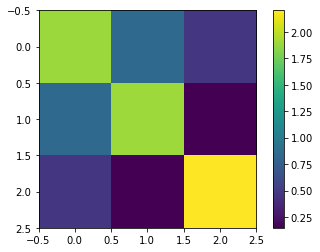

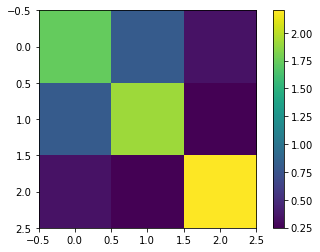

In [173]:
plt.imshow(cov)
plt.colorbar()
plt.show()
plt.imshow(cov_esti)
plt.colorbar()
plt.show()

In [506]:
def create_Gaussian_data(eigs, means, data_num, rand_state=4108):
    data_dim = len(eigs)
    R    = ortho_group.rvs(data_dim,random_state=rand_state)
    cov  = np.dot(np.dot(R,np.diag(eigs)),R.T)
    L    = lg.cholesky(cov,lower=True)
    data = np.random.randn((data_dim*data_num)).reshape((data_num, data_dim))
    data = np.einsum('ij,kj->ki',L,data)+means
    return data, cov

In [507]:
data_num  = 100
data_dim  = 20
data, cov = create_Gaussian_data(eigs=np.arange(data_dim)+1,means=np.ones(data_dim)*10.,data_num=data_num)
print(np.sort(np.diag(cov)),np.arange(data_dim)+1)

[  7.91095017   8.16912199   8.20643278   8.26944111   8.56820411
   9.17152577   9.42295837  10.04526724  10.06449623  10.65979408
  11.35814594  11.44841191  11.49357145  11.68097966  11.7710439
  11.91918807  11.9784667   12.00485155  12.08479449  13.77235447] [ 1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20]


In [508]:
data_    = data-np.mean(data, axis=0)
cov_esti = np.dot(data_.T, data_)/(data_num-1)

In [509]:
import os
import pickle as pkl
def nercome_estimator(data,resultpath,splits=None,num_esti=None):
    if not os.path.exists(resultpath):
        os.makedirs(resultpath)
    
    nn      = len(data)
    ddim    = data.shape[1]
    if splits== None:
        splits = [0.33,0.4,0.45,0.5,0.55,0.66,0.7,0.75,0.8]
    if num_esti== None:
        num_esti  = min(nn//1,400)

    minQs      = -1
    best_split = 0.
    best_esti  = np.zeros((data_dim,data_dim))
    for split_frac in splits:
        print('nercome estimation with split %.2f, #samples %d'%(split_frac,num_esti))
        split    = np.int(split_frac*nn)
        cov      = np.zeros((ddim,ddim))
        cov_esti = np.zeros((ddim,ddim))
        for ii in range(num_esti):
            np.random.shuffle(data)
            data1 = data[0:split]
            data2 = data[split::]
            cov1     = EmpiricalCovariance().fit(data1).covariance_
            w1,v1    = lg.eigh(cov1)
            del cov1, w1
            cov2     = EmpiricalCovariance().fit(data2).covariance_
            diags    = np.diag(np.dot(np.dot(v1.T,cov2),v1))
            esti     = np.dot(np.dot(v1,np.diag(diags)),v1.T)
            cov+=cov2/num_esti
            del cov2
            cov_esti+=esti/num_esti

        Q = dist(cov_esti, cov)
        print(Q)
        if minQs==-1 or Q<minQs:
            minQs=Q
            best_split=split_frac
            best_esti= cov_esti
            pkl.dump([best_split,cov_esti], open(os.path.join(resultpath,'nercome_estimate.pkl'),'wb'))
    
    return best_split, best_esti

In [510]:
best_split, best_esti = nercome_estimator(data,resultpath='../outputs/tests/',splits=None,num_esti=None)

(100, 20)
nercome estimation with split 0.33, #samples 100
408.556668066
nercome estimation with split 0.40, #samples 100
380.190616297
nercome estimation with split 0.45, #samples 100
356.181948215
nercome estimation with split 0.50, #samples 100
321.06549773
nercome estimation with split 0.55, #samples 100
318.348931515
nercome estimation with split 0.66, #samples 100
271.305459058
nercome estimation with split 0.70, #samples 100
285.164518255
nercome estimation with split 0.75, #samples 100
273.714247052
nercome estimation with split 0.80, #samples 100
268.055405913
0.8


In [511]:
def dist(cov1,cov2):
    A = cov1-cov2
    dist = np.trace(np.dot(A,A.T))
    return dist

In [514]:
print('distance to empirical cov', dist(cov_esti,cov))
print('distance to nercome cov', dist(best_esti,cov))

distance to empirical cov 508.273879133
distance to nercome cov 262.144329578


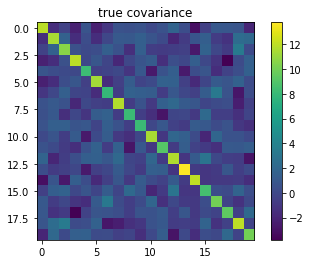

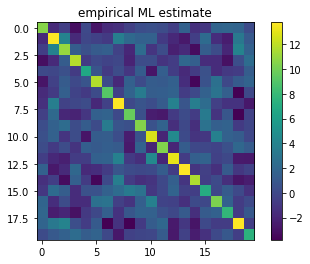

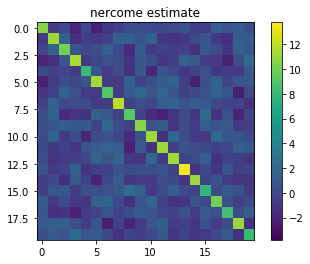

In [516]:
vmin = min(cov.flatten())
vmax = max(cov.flatten())
plt.title('true covariance')
plt.imshow(cov,vmin=vmin,vmax=vmax)
plt.colorbar()
plt.show()
plt.title('empirical ML estimate')
plt.imshow(cov_esti,vmin=vmin,vmax=vmax)
plt.colorbar()
plt.show()
plt.title('nercome estimate')
plt.imshow(best_esti,vmin=vmin,vmax=vmax)
plt.colorbar()
plt.show()

In [ ]:
def create_Gaussian_data(eigs, means, data_num, rand_state=4108):
    data_dim = len(eigs)
    R    = ortho_group.rvs(data_dim,random_state=rand_state)
    cov  = np.dot(np.dot(R,np.diag(eigs)),R.T)
    L    = lg.cholesky(cov,lower=True)
    data = np.random.randn((data_dim*data_num)).reshape((data_num, data_dim))
    data = np.einsum('ij,kj->ki',L,data)+means
    return data, cov

